# Travel Insurance Prediction

### Problem Statement-Travel Insurance companies to know whether the insured will claim the policy in the future or not,which can save thousands of dollars.

In [80]:
import matplotlib.pyplot as plt    
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#### Reading the csv file with the help of pandas library 

In [138]:
df =  pd.read_csv(r"C:\Users\mudda\Downloads\archive (2)\Travel_Insurance.csv")
df

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision_1,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


# Data Preparation


> - Agency
> - Agency_Type
> - Destination
> - Duration
> - Age
> - Claim
> - Gender

##  Checking shape of dataset total rows and columns 

In [82]:
df.shape       

(63326, 11)

In [83]:
df.columns

Index(['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name',
       'Claim', 'Duration', 'Destination', 'Net_Sales', 'Commision_1',
       'Gender', 'Age'],
      dtype='object')

In [84]:
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency_Type           63326 non-null  object 
 2   Distribution_Channel  63326 non-null  object 
 3   Product_Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net_Sales             63326 non-null  float64
 8   Commision_1           63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [85]:
df.head()         # Starting 5 rows

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision_1,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [86]:
df.tail()         # Last 5 rows

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision_1,Gender,Age
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63
63325,JZI,Airlines,Online,Basic Plan,No,22,HONG KONG,26.0,9.10,F,35


In [87]:
df.describe()          # Returns description of the data in the dataframe

,Duration,Net_Sales,Commision_1,Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.968402
std,101.791566,48.845637,19.804388,14.013851
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [88]:
df.describe(include="all")

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision_1,Gender,Age
count,63326,63326,63326,63326,63326,63326.000000,63326,63326.000000,63326.000000,18219,63326.000000
unique,16,2,2,26,2,NaN,149,NaN,NaN,2,NaN
top,EPX,Travel Agency,Online,Cancellation Plan,No,NaN,SINGAPORE,NaN,NaN,M,NaN
freq,35119,45869,62219,18630,62399,NaN,13255,NaN,NaN,9347,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.317074,NaN,40.702018,9.809992,NaN,39.968402
std,NaN,NaN,NaN,NaN,NaN,101.791566,NaN,48.845637,19.804388,NaN,14.013851
min,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,NaN,35.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.530000,0.000000,NaN,36.000000
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,NaN,43.000000


## Converting categorical data into numerical 

In [139]:
df.dtypes

Agency                   object
Agency_Type              object
Distribution_Channel     object
Product_Name             object
Claim                    object
Duration                  int64
Destination              object
Net_Sales               float64
Commision_1             float64
Gender                   object
Age                       int64
dtype: object

In [140]:
df.Destination=le.fit_transform(df.Destination)

In [141]:
df.dtypes

Agency                   object
Agency_Type              object
Distribution_Channel     object
Product_Name             object
Claim                    object
Duration                  int64
Destination               int32
Net_Sales               float64
Commision_1             float64
Gender                   object
Age                       int64
dtype: object

# Checking duplicate values

In [89]:
df.duplicated().value_counts()    # True means duplicate rows

False    55284
True      8042
dtype: int64

In [90]:
df = df.drop_duplicates()

In [91]:
df.shape

(55284, 11)

# Checking the missing values

In [92]:
df.isnull().sum()          #returns the number of missing values in dataset

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commision_1                 0
Gender                  38325
Age                         0
dtype: int64

In [93]:
df.Gender.value_counts()

M    8558
F    8401
Name: Gender, dtype: int64

# Data Visualization

## Agency 

In [98]:
df = df.Agency.value_counts()       # Count the no of records

In [99]:
df

EPX    28956
CWT     8082
C2B     7782
JZI     6043
SSI      950
LWC      684
RAB      646
TST      500
JWT      440
KML      335
ART      325
CCR      178
CBH      101
TTW       94
CSR       86
ADM       82
Name: Agency, dtype: int64

In [173]:
df.Agency.nunique()

16

C:\EB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


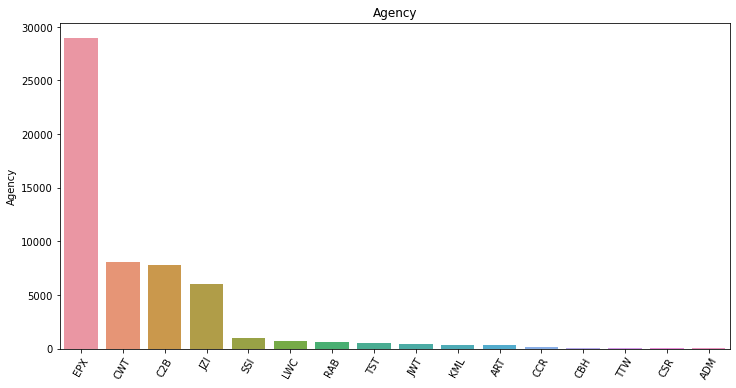

In [101]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.title('Agency')
sns.barplot(df.index, df);

## Agency_Type 

In [161]:
df.Agency_Type.unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [162]:
df["Agency_Type"].value_counts()

Travel Agency    45869
Airlines         17457
Name: Agency_Type, dtype: int64

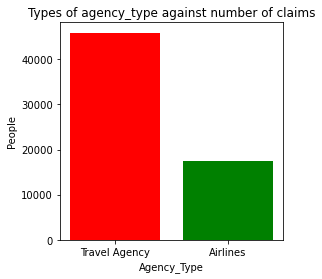

In [164]:
dfplot = df.groupby(by=['Agency_Type']).size().reset_index(name="counts")
dfplot = dfplot.nlargest(10,['counts'])
plt.figure(figsize=(4, 4))
plt.bar(dfplot['Agency_Type'],dfplot['counts'],color=['Red','Green'])
plt.xlabel("Agency_Type")
plt.ylabel("People")
plt.title('Types of agency_type against number of people')
plt.show()


## Destination 

In [122]:
X = df.Destination.value_counts().head(20)

In [123]:
X

SINGAPORE                    13255
MALAYSIA                      5930
THAILAND                      5894
CHINA                         4796
AUSTRALIA                     3694
INDONESIA                     3452
UNITED STATES                 2530
PHILIPPINES                   2490
HONG KONG                     2411
INDIA                         2251
JAPAN                         2061
VIET NAM                      1669
KOREA, REPUBLIC OF            1479
UNITED KINGDOM                1309
TAIWAN, PROVINCE OF CHINA     1090
MYANMAR                        806
BRUNEI DARUSSALAM              780
NEW ZEALAND                    537
CANADA                         528
CAMBODIA                       493
Name: Destination, dtype: int64

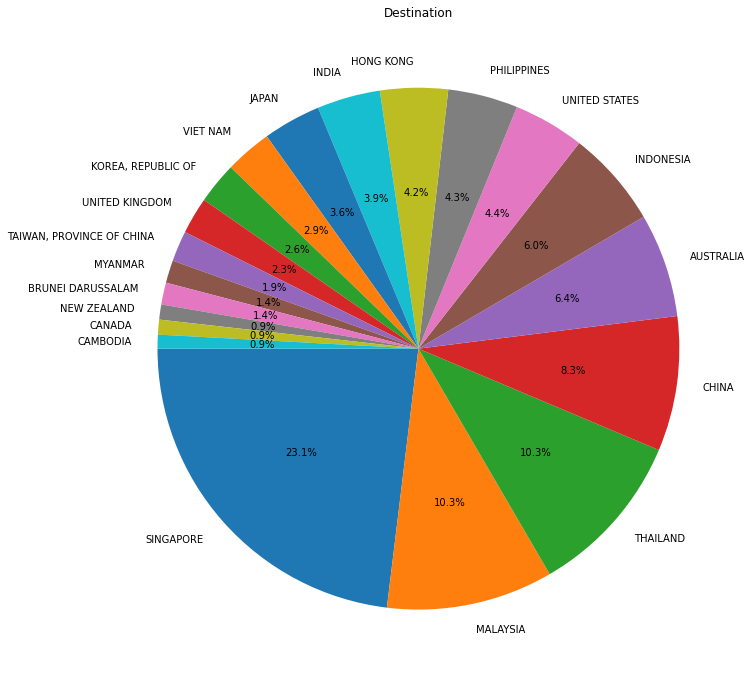

In [133]:
plt.figure(figsize=(22,12))
plt.title('Destination')
plt.pie(X, labels=X.index, autopct='%1.1f%%', startangle=180);

### Singapore is the destination with the highest number of insured persons. 

## Gender

Text(0.5, 0, 'count')

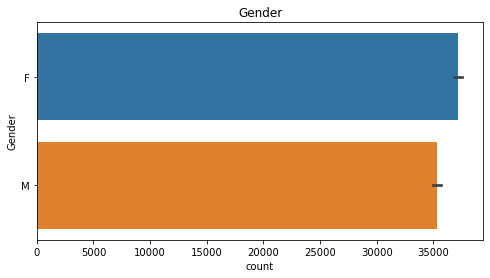

In [134]:
plt.figure(figsize=(8, 4))
sns.barplot(y = df.Gender, x = df.index)
plt.title("Gender");
plt.xlabel('count')

#### From the plot we can see that there are more female insured persons than the male. 

## Claim 

In [170]:
df.Claim.value_counts() 

No     62399
Yes      927
Name: Claim, dtype: int64

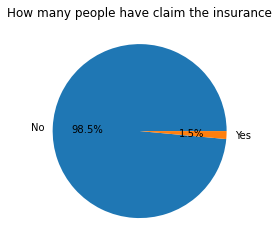

In [171]:
D = df.groupby(by=["Claim"]).size().reset_index(name="counts")
D = D.nlargest(2,['counts'])
plt.pie(x=D['counts'],labels=D['Claim'],autopct='%1.1f%%')
plt.title('How many people have claim the insurance')
plt.show()

#### The plot shows only 1.5%people have claim their insurance and 98.5% people have not claimed yet. 

C:\EB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Agency', ylabel='Age'>

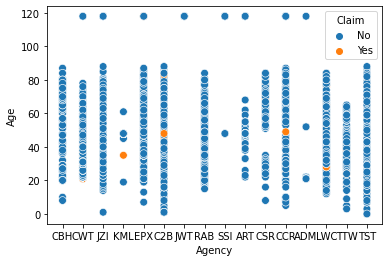

In [143]:
sns.scatterplot(df.Agency, df.Age, hue = df.Claim, s =60)

#### The plot shows there is little claim already done and it is within the age of 20 to 60. Others have not been claimed yet. 

## Agency Rating of the insured persons in percentage 

C:\EB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


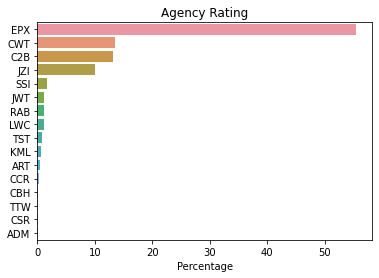

In [144]:
Agency_pct = df.Agency.value_counts() * 100 / df.Agency.count()
  
sns.barplot(Agency_pct, Agency_pct.index)

plt.title('Agency Rating')
plt.ylabel(None);
plt.xlabel('Percentage');

## Get the details of an insured person from the data frame 

In [148]:
df.loc[540]

Agency                                EPX
Agency_Type                 Travel Agency
Distribution_Channel               Online
Product_Name            Cancellation Plan
Claim                                  No
Duration                               33
Destination                            26
Net_Sales                            32.0
Commision_1                           0.0
Gender                                NaN
Age                                    36
Name: 540, dtype: object

#### We have been able to get the details of the insured person with serial number 540 from the data frame. 

##  How many of the insured persons are still young 

C:\EB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


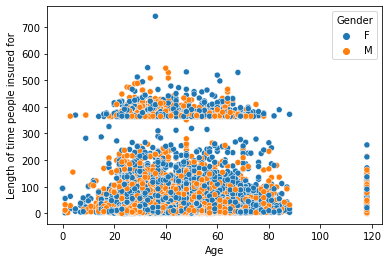

In [152]:
sns.scatterplot('Age', 'Duration', hue='Gender', data = df)
plt.xlabel("Age")
plt.ylabel("Length of time people insured for");

#### We can see points on the graph showing the number of young people who are insured. Also, we can see that old people are insured as well. 

## Total duration on the travel insurance done by the people

In [159]:
Duration_time = df.Duration.sum()

In [160]:
print("The overall duration for all the insured persons is {:.2f} %.".format(Duration_time * 100))

The overall duration for all the insured persons is 312305300.00 %.


## Correalation Map 

<AxesSubplot:>

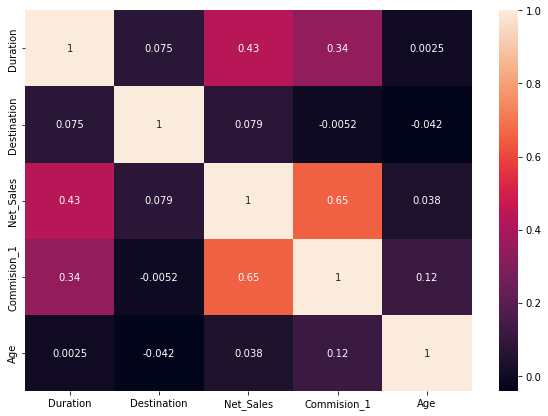

In [172]:
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(df.corr(), ax = ax, annot = True)

# Inferences and Conclusion

>- Based on the Agency we can see the different agencies offering travel insurance to people and the edge of one over the other.
>- The Destination is not as diverse as it can be, their some destinations mostly preferred by the insured persons as it clearly given in the analysis.
>- Most insured persons are within the age 20-80, although a little number of people insured are 120 years of Age.
>- The duration of the insurance varies from one person to another.
>- Most insurance claim have not been done yet compared to the ones already claimed.
    You can enrol for travel insurance at any age, and majority of the insured persons have not claimed the insurance fund.